In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

In [2]:
MAX_VOCAB_SIZE=5000

(x_train, y_train),(x_test, y_test)=imdb.load_data(num_words=MAX_VOCAB_SIZE)

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [4]:
y_train[1]

0

In [5]:
word2idx=imdb.get_word_index()
V=len(word2idx)
V

88584

In [6]:
max_words=500
x_train=sequence.pad_sequences(x_train, maxlen=max_words)
x_test=sequence.pad_sequences(x_test, maxlen=max_words)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 500), (25000, 500), (25000,), (25000,))

In [8]:
T=x_train.shape[1]

In [9]:
V=5000

In [10]:
D=32
M=100

i=Input(shape=(T,))
x=Embedding(V+1, D)(i)
x=LSTM(M, return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1, activation='sigmoid')(x)
model=Model(i, x)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 32)           160032    
_________________________________________________________________
lstm (LSTM)                  (None, 500, 100)          53200     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
r=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 32s 41ms/step - loss: 0.4241 - accuracy: 0.8006 - val_loss: 0.3030 - val_accuracy: 0.8729
Epoch 2/5
782/782 [==============================] - 34s 43ms/step - loss: 0.2533 - accuracy: 0.8977 - val_loss: 0.2976 - val_accuracy: 0.8730
Epoch 3/5
782/782 [==============================] - 32s 41ms/step - loss: 0.2045 - accuracy: 0.9204 - val_loss: 0.3121 - val_accuracy: 0.8774
Epoch 4/5
782/782 [==============================] - 33s 42ms/step - loss: 0.1681 - accuracy: 0.9383 - val_loss: 0.3072 - val_accuracy: 0.8805
Epoch 5/5
782/782 [==============================] - 33s 42ms/step - loss: 0.1371 - accuracy: 0.9514 - val_loss: 0.3138 - val_accuracy: 0.8773


In [14]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.3138 - accuracy: 0.8773


[0.3137950897216797, 0.8773199915885925]

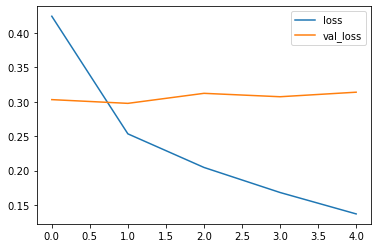

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

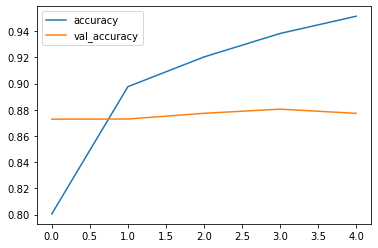

In [18]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [20]:
pred=model.predict(x_test)

In [21]:
predd=np.round(pred).flatten()
predd

array([0., 1., 1., ..., 0., 0., 1.], dtype=float32)

In [22]:
pred=pred.flatten()

In [23]:
pred

array([0.00327418, 0.99719054, 0.61215514, ..., 0.00865121, 0.08121824,
       0.7103858 ], dtype=float32)

In [24]:
keys=list(word2idx.keys())
values=list(word2idx.values())

In [27]:
for i in x_test[1]:
    if(i!=0):
        id=keys[values.index(i)]
        if(id=="br"):
            print(" ")
        else:
            print(id,end=' ')
print(" ")
print(" ")
print("pos sentiment: ", round(pred[1]*100,2))
print("neg sentiment: ", round((1-pred[1])*100,2))

the as you world's is quite  
and most that quest are chase to being quickly of little it time hell to plot  
of something long put are of every place this and and of and storytelling being nasty not of you warren in is failed club i i of films pay so sequences and film okay uses to received and if time done for room and viewer as cartoon of gives to forgettable  
be because many these of and and contained gives it wreck scene to more was two when had find as you another it of themselves probably who and storytelling if itself by  
about 1950's films not would effects that her box to miike for if hero close seek end is very together movie of and got say kong and fred close bore there is playing lot of and pan place trilogy of lacks  
of their time much this men as on it is telling program  
and okay and to frustration at corner and she of sequences to political clearly in of drugs keep guy i i was throwing room and as it by  
be plot many for occasionally film and boyfriend difficult k